# Music recommender system
**To built a recommender system using Machine learning algorithms and to provide personalize recommendation to the users using <br> 1. Content - based filtering<br>
2.Popularity - based filtering <br>
3.Collaborative filtering.**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Converting text format to csv format

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/dataset/kaggle_visible_evaluation_triplets.csv")

In [ ]:
df1.head()

,user_id,song_id,PlayCount
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1450933 non-null  object
 1   song_id    1450933 non-null  object
 2   PlayCount  1450933 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/dataset/unique_tracks.csv")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Genre        1000000 non-null  object
 1   song_id      1000000 non-null  object
 2   Artist Name  1000000 non-null  object
 3   Title        999985 non-null   object
dtypes: object(4)
memory usage: 30.5+ MB


In [ ]:
df2.head()

,Genre,song_id,Artist Name,Title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [ ]:
df2.drop(['Genre'],axis = 1,inplace = True)

In [ ]:
df2.head()

,song_id,Artist Name,Title
0,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


# Merging the dataframes

In [ ]:
song_df = pd.merge(df1,df2.drop_duplicates(['song_id']),on = "song_id",how='left')

In [ ]:
len(song_df)

1450933

In [ ]:
song_df.dropna(axis=0,inplace = True)

In [ ]:
song_df.head()

,user_id,song_id,PlayCount,Artist Name,Title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [ ]:
song_df.describe()

,PlayCount
count,1.450932e+06
mean,3.187151e+00
std,7.051666e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [ ]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450932 entries, 0 to 1450932
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1450932 non-null  object
 1   song_id      1450932 non-null  object
 2   PlayCount    1450932 non-null  int64 
 3   Artist Name  1450932 non-null  object
 4   Title        1450932 non-null  object
dtypes: int64(1), object(4)
memory usage: 66.4+ MB


In [ ]:
song_df.shape

(1450932, 5)

# Plot for playcount

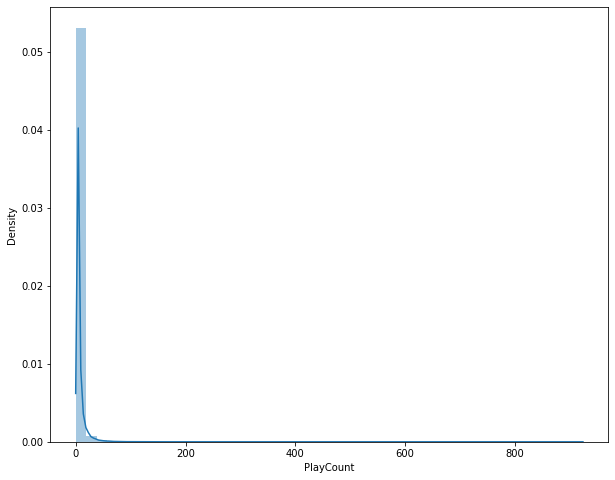

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(song_df['PlayCount'])

# Unique users in each attribute

In [ ]:
print("Total number of data:",song_df.shape[0])
print("Total number of unique user:",song_df["user_id"].unique().shape[0])
print("Total number of unique Songs:",song_df["song_id"].unique().shape[0])
print("Total number of unique Artist:",song_df["Artist Name"].unique().shape[0])
print("Total number of unique Title:",song_df["Title"].unique().shape[0])

Total number of data: 1450932
Total number of unique user: 110000
Total number of unique Songs: 163205
Total number of unique Artist: 28360
Total number of unique Title: 137622


# Most frequent User ID

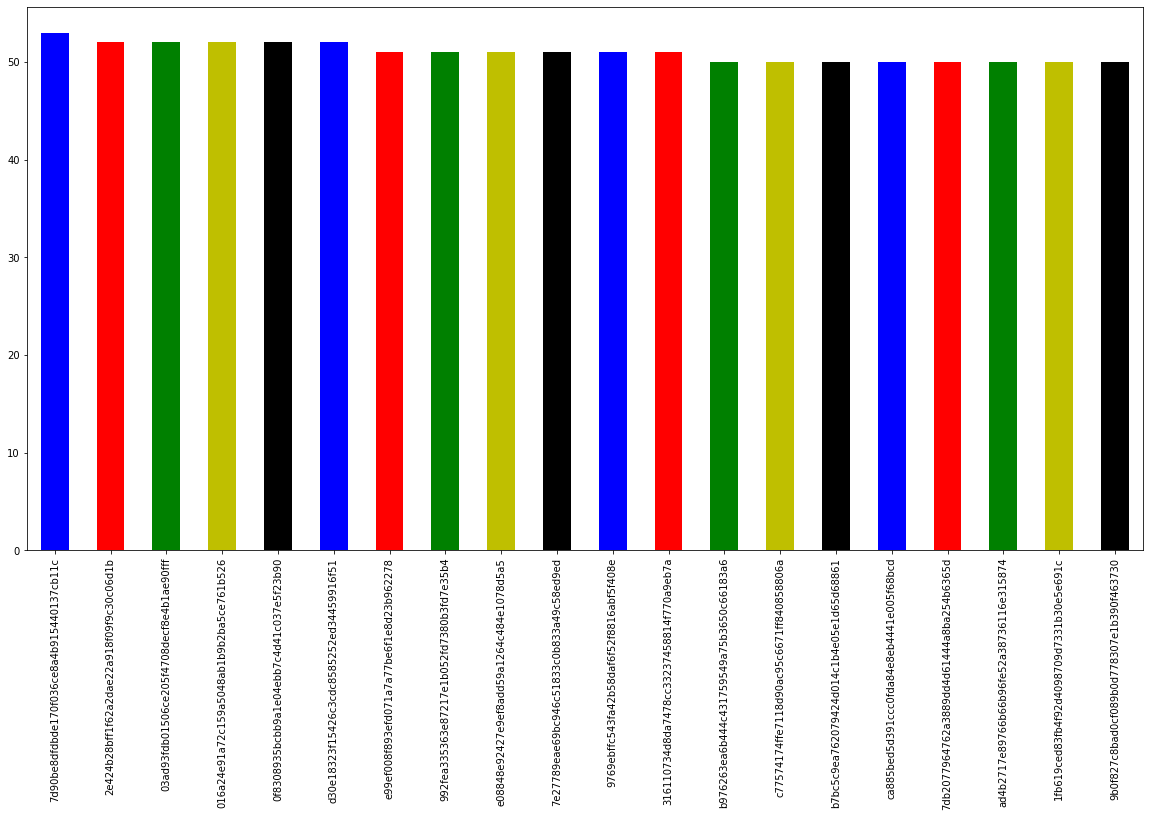

In [ ]:
from itertools import islice,cycle
freq1 = song_df.loc[:,'user_id'].value_counts()[:20] 
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(freq1)))
freq1.plot(kind="bar",figsize=(20,10),stacked = True,color = my_colors)

# Grouping data using User ID

In [ ]:
user_count = song_df.groupby('user_id')['PlayCount'].sum()
user_count1 = user_count.sort_values(ascending = False).head(20)
user_count1

user_id
090b841eaf56d343a26625c2c6d08b823927bc4f    1305
938c2632d43eeadb8a83a7cc254d014f9cea6afe    1267
1c5aa998482a40abfd020759e7d757eb6c510e72    1200
c6150292374fb1dad89982367b3245dd5004c718    1192
5a9375e46a7e9b869058c7bc0e820e00d77f3e0b    1184
d1d845a92cd34456423e781512bdb502ca385b51    1180
957440a77858369fb7a6bcc6fa408fc187d5bd7b    1150
315103a41c2ced1143de0c2ba20de224800e6d89    1148
22bb29714137fa47083963c30e1a26f1bf517e7d    1141
bda891a59a96252cc0f5b1f63f2630692b490e37    1140
b51eeda3c09e2426f2e52dca8444a8c0cab6265a    1119
b371df81acfde601d157a99c50fa06f7b3f76a84    1038
9d12c30de5d9975f621f95f512699989ac544410    1001
7bb7949be3d91d27f1c5613bea01644fcad77f43     996
a1cc4d088600df2db42e6a305974675ffe8c905d     951
77867fcbd93f3bf47f478a797f3bfabb0f561ea8     926
a86e68128c6a48d3392db22ce1151a3bdccf5fcf     912
9948794b0687c0b3cd2094845cb7915d55793492     884
08879a07270b36aaa09923890b221fdef1e9849e     884
04383d89810d0113066c28b631097711d2550b04     867
Name: PlayCo

In [ ]:
user_count.sort_values(ascending=True).head()

user_id
219c456aaa463013ec3e08ed10ab1b5cded1a46e    5
13e24d4e0a2565607d5d1c5a734cff9c347044df    5
be8429f24fc9d4a9c629d3807948c51e7a0a2f9b    5
d431e054366a0fb5a9adf4c15728b8948857eb57    5
46081c034ec6f930d5f14c9cae5a9dfbac6ec171    5
Name: PlayCount, dtype: int64

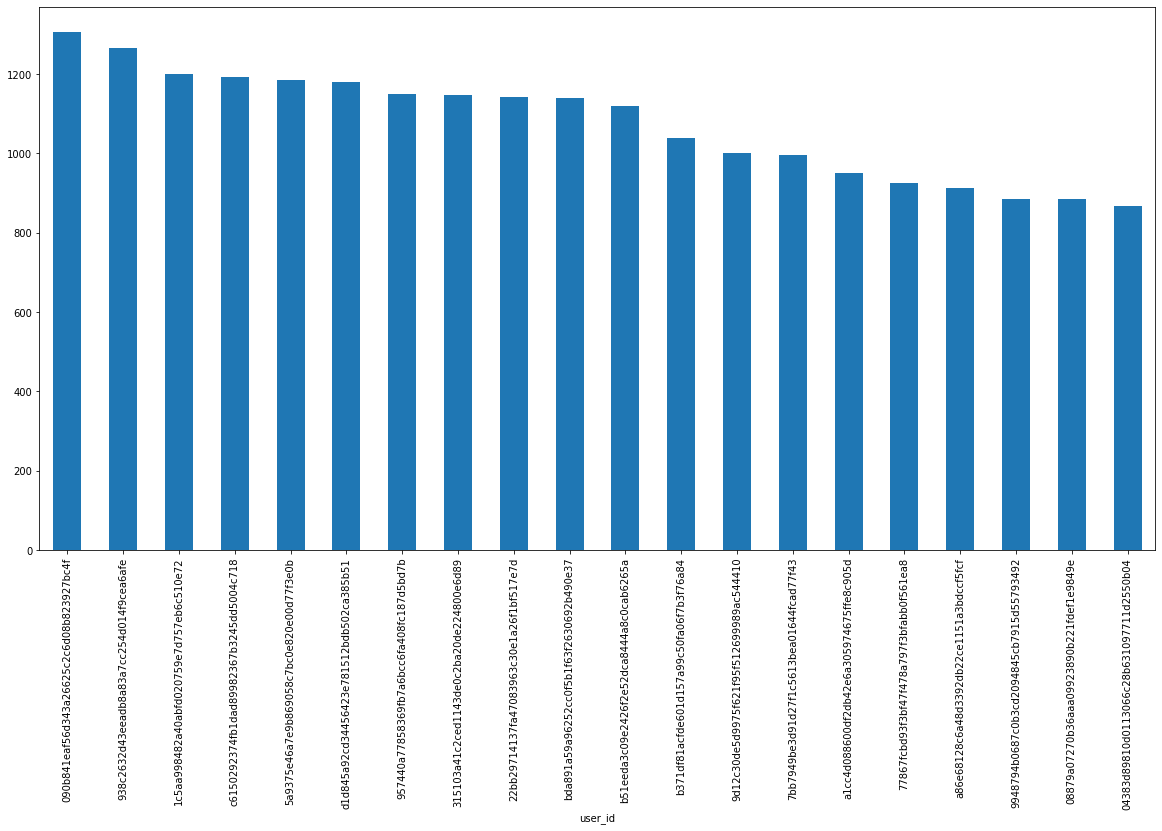

In [ ]:
user_count1.plot(kind="bar",figsize=(20,10))

# Most frequent Song ID

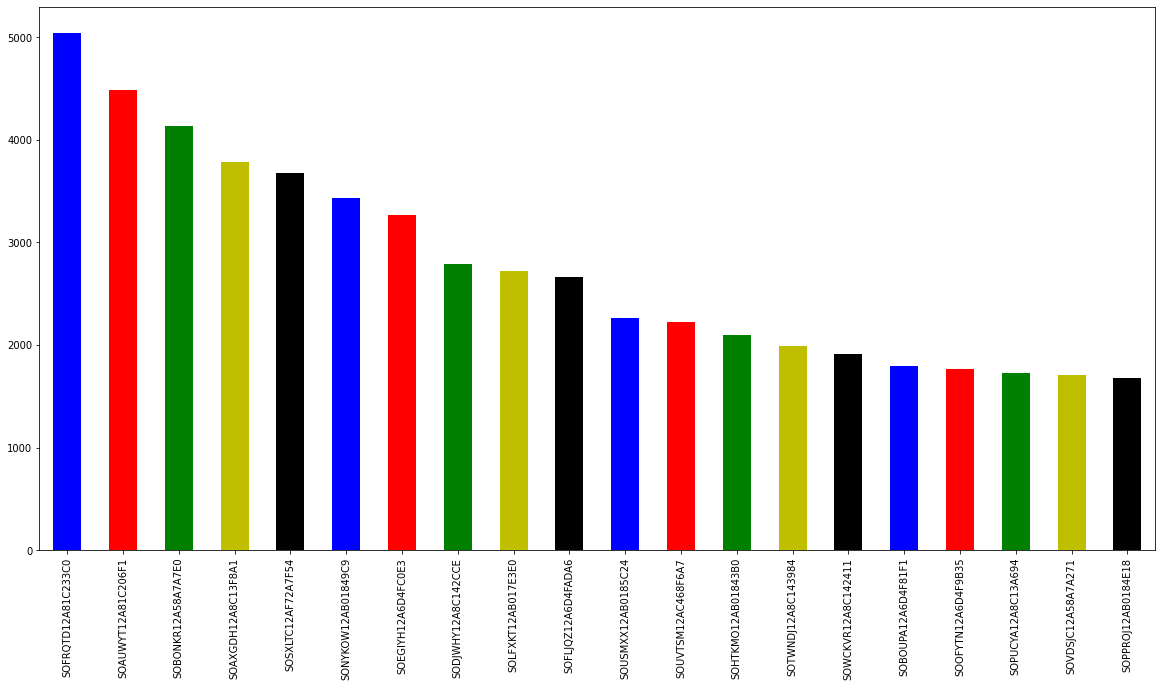

In [ ]:
freq2 = song_df.loc[:,'song_id'].value_counts()[:20] 
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(freq2)))
freq2.plot(kind="bar",figsize=(20,10),stacked = True,color = my_colors)

# Grouping data using Song ID

In [ ]:
song_count = song_df.groupby('song_id')['PlayCount'].sum()
song_count1 = song_count.sort_values(ascending = False).head(20)
song_count1

song_id
SOBONKR12A58A7A7E0    35432
SOAUWYT12A81C206F1    33179
SOSXLTC12AF72A7F54    24359
SOFRQTD12A81C233C0    19454
SOEGIYH12A6D4FC0E3    17115
SOAXGDH12A8C13F8A1    14279
SONYKOW12AB01849C9    12392
SOVDSJC12A58A7A271    11610
SOUFTBI12AB0183F65    10794
SOHTKMO12AB01843B0    10515
SOPUCYA12A8C13A694     9921
SOOFYTN12A6D4F9B35     9685
SOBOUPA12A6D4F81F1     8972
SODJWHY12A8C142CCE     8718
SOLFXKT12AB017E3E0     8093
SOTCMDJ12A6D4F8528     7969
SOFLJQZ12A6D4FADA6     7895
SOTWNDJ12A8C143984     7331
SOUVTSM12AC468F6A7     7210
SOUNZHU12A8AE47481     7052
Name: PlayCount, dtype: int64

In [ ]:
song_count.sort_values(ascending=True).head()

song_id
SOIDGCM12A81C2233D    1
SOQIZHS12A8C13B4E0    1
SOEGPVB12AB0188E0A    1
SOEGPWH12A6D4F810C    1
SOQIYOI12A81C21693    1
Name: PlayCount, dtype: int64

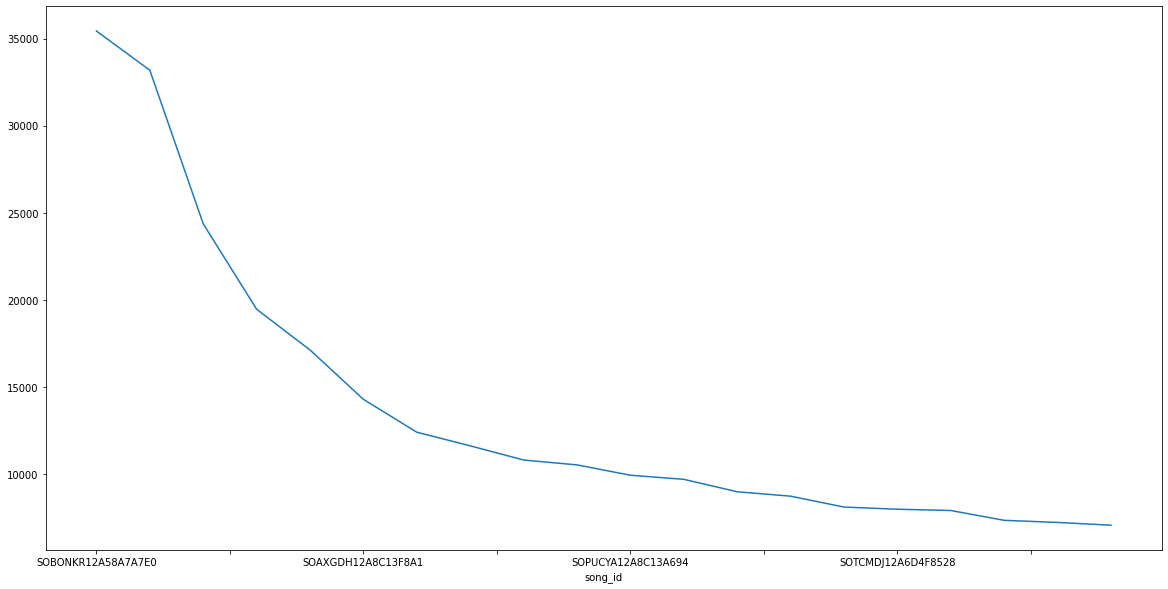

In [ ]:
song_count1.plot(kind="line",figsize=(20,10))

# Very popular artist

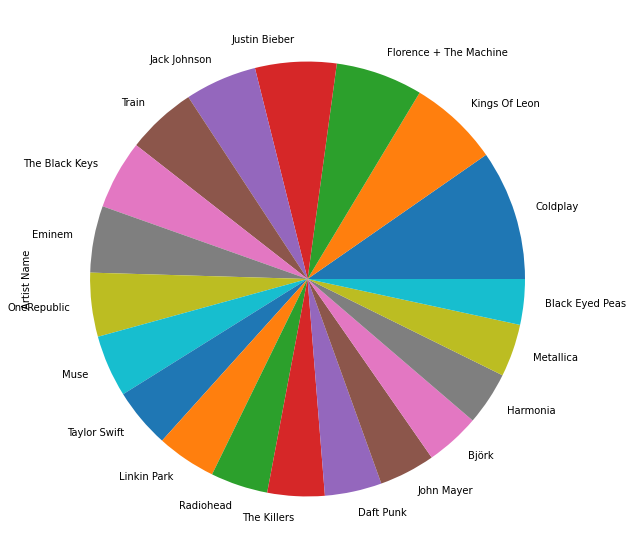

In [ ]:
freq3 = song_df.loc[:,'Artist Name'].value_counts()[:20] 
freq3.plot(kind="pie",figsize=(20,10),stacked = True)

# Grouping songs using artist name

In [ ]:
artist = song_df.groupby('Artist Name')['PlayCount'].sum()
artist1 = artist.sort_values(ascending=False).head(20)
artist1

Artist Name
Kings Of Leon                                                             35857
Dwight Yoakam                                                             35688
Björk                                                                     35210
Coldplay                                                                  32135
Florence + The Machine                                                    28224
Justin Bieber                                                             26133
Alliance Ethnik                                                           21603
Train                                                                     21356
OneRepublic                                                               20802
Harmonia                                                                  19461
Jack Johnson                                                              18333
Linkin Park                                                               18256
Eminem                      

In [ ]:
artist.sort_values(ascending=True).head()

Artist Name
Özlem Tekin            1
Freeway / Rick Ross    1
Bjørn Afzelius         1
Bjørn Berge            1
Scott Reeder           1
Name: PlayCount, dtype: int64

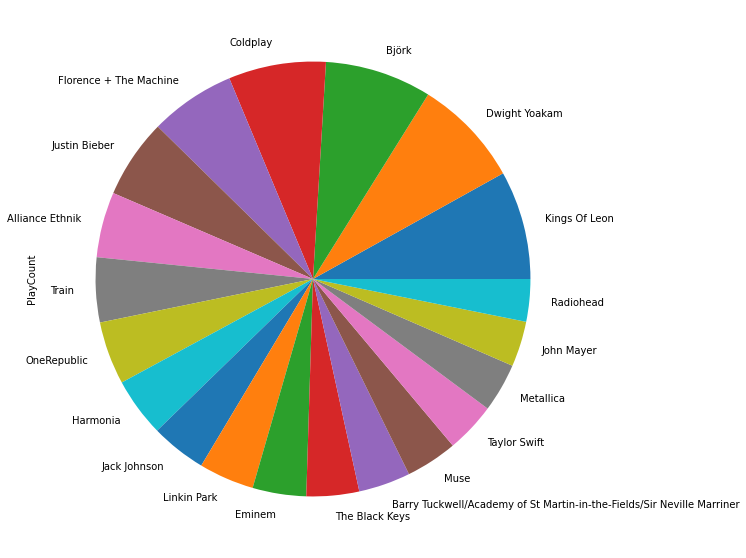

In [ ]:
artist1.plot(kind="pie",figsize=(20,10))

# Most popular relase

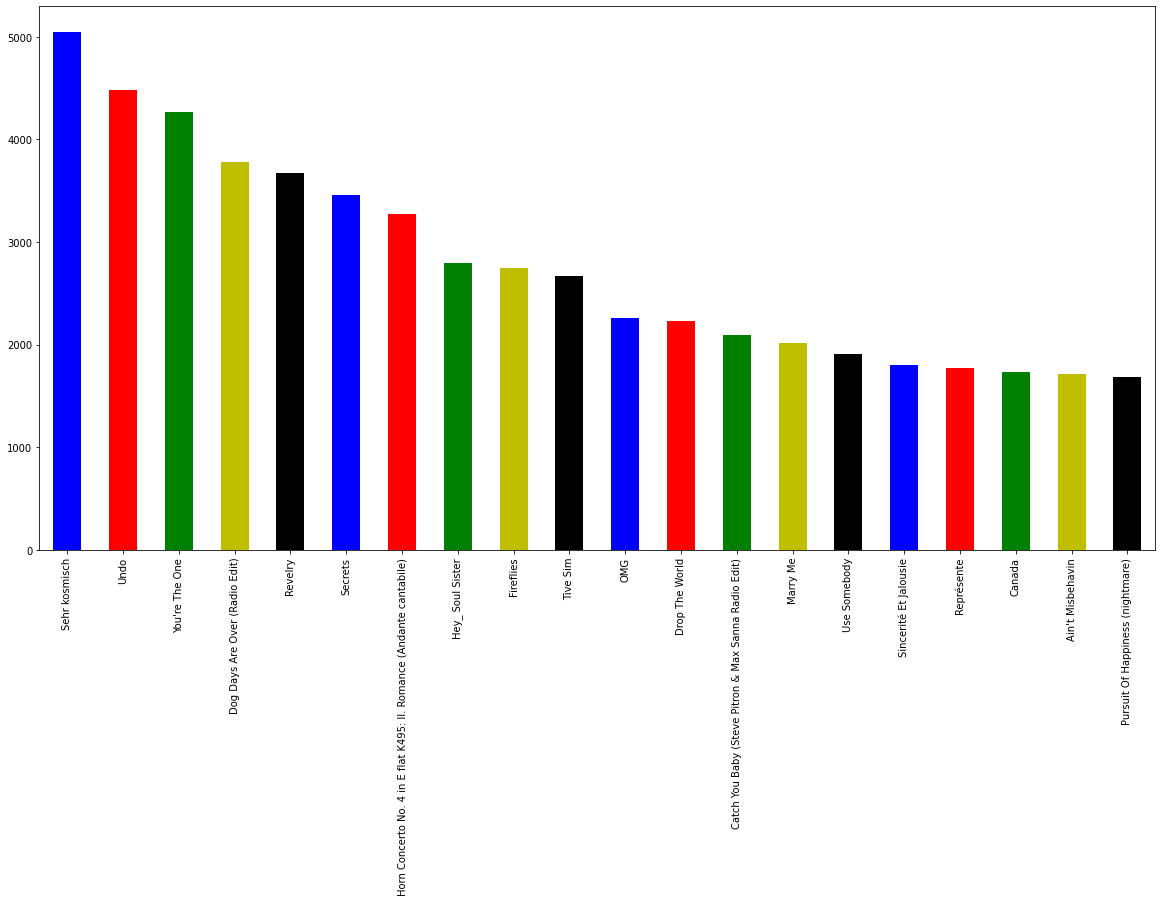

In [ ]:
freq2 = song_df.loc[:,'Title'].value_counts()[:20] 
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(freq2)))
freq2.plot(kind="bar",figsize=(20,10),stacked = True,color = my_colors)

# Grouping songs using title

In [ ]:
title = song_df.groupby('Title')['PlayCount'].sum()
title1 = title.sort_values(ascending = False).head(20)
title1

Title
You're The One                                                         35738
Undo                                                                   33179
Revelry                                                                24359
Sehr kosmisch                                                          19454
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    17115
Dog Days Are Over (Radio Edit)                                         14279
Secrets                                                                12492
Ain't Misbehavin                                                       11610
Invalid                                                                10794
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)                   10515
Canada                                                                  9927
Représente                                                              9685
Sincerité Et Jalousie                                                 

In [ ]:
title.sort_values(ascending = True).head()

Title
Love Has A Diameter    1
Las Dos Nenas          1
Las Floried            1
Las Guerras            1
Las Isabeles           1
Name: PlayCount, dtype: int64

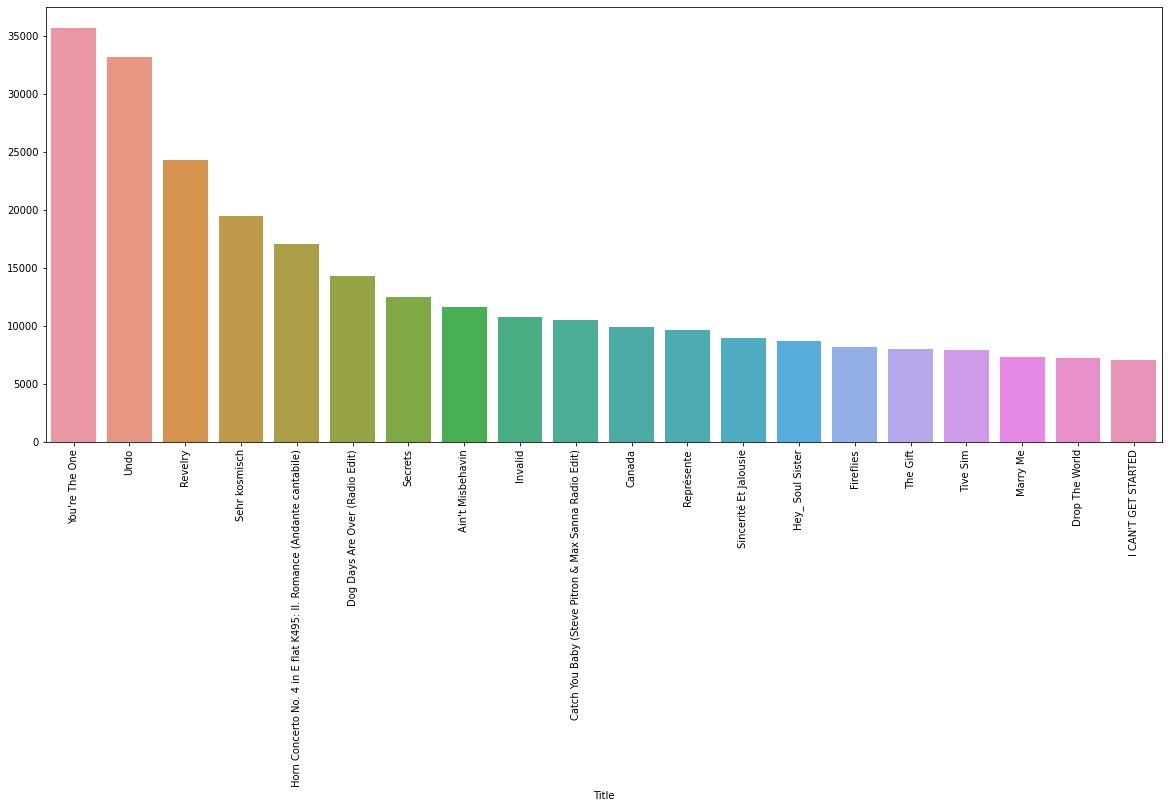

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(title1.index,title1.values)
plt.xticks(rotation=90)
plt.show()

# Popular artist and thier songs
**1.King of leon**

In [ ]:
pop1 = song_df['Artist Name']=='Kings Of Leon'
pop_1 = song_df[pop1]
a = pop_1['Title'].unique()
print(a)

['Genius' 'Revelry' 'Use Somebody' 'Knocked Up' 'Closer'
 "Molly's Chambers" 'Ragoo' 'Dusty' 'Manhattan' 'Camaro' 'I Want You'
 'Cold Desert' 'Holy Roller Novocaine' 'Arizona' 'McFearless'
 'Be Somebody' 'Day Old Blues' 'Rememo' 'Happy Alone' 'King Of The Rodeo'
 'Milk' 'Pistol Of Fire' 'The Runner' 'Velvet Snow' "Joe's Head" 'Charmer'
 'California Waiting' 'Trunk' 'Trani' 'Where Nobody Knows' 'Fans'
 'Slow Night_ So Long' 'Soft' 'Razz' 'Taper Jean Girl' 'Black Thumbnail'
 'Beneath The Surface' 'Frontier City' 'Four Kicks']


In [ ]:
print("Number of songs created by King of Leon:",len(a))

Number of songs created by King of Leon: 39


**2.Dwight Yoakam**     

In [ ]:
pop2 = song_df['Artist Name']=='Dwight Yoakam'
pop_2 = song_df[pop2]
b = pop_2['Title'].unique()
print(b)

["You're The One" 'Long White Cadillac (2006 Remastered LP Version)'
 'Rocky Road Blues (Live at the Roxy-1986) (Previously Unissued)'
 'One More Night (LP Version)' 'Nothing (LP Version)'
 'Pocket Of A Clown (2006 Remastered LP Version)'
 "Traveler's Lantern (LP Version)" "That's Okay (LP Version)"
 'This Much I Know (LP Version)'
 "Readin'_ Rightin'_ Rt. 23 (Acoustic LP Version)"
 'Louisville (2006 Remastered LP Version)'
 'Mystery Train (2006 Remastered Live Version)' 'Near You (LP Version)'
 'Ring Of Fire (Album Version) (2006 Remastered)' 'Listen (LP Version)'
 'Cattle Call' 'Baby Why Not (LP Version)'
 "What I Don't Know (LP Version)"]


In [ ]:
print("Number of songs created by Dwight Yoakam:",len(b))

Number of songs created by Dwight Yoakam: 18


**3.Björk**

In [ ]:
pop3 = song_df['Artist Name']=='Björk'
pop_3 = song_df[pop3]
c = pop_3['Title'].unique()
print(c)

['Undo' "It's Oh So Quiet" 'Army of Me' 'Cover Me' 'Human Behaviour'
 'Come To Me' 'Possibly Maybe' 'Scary' 'Big Time Sensuality'
 'The Modern Things' 'Where Is The Line' 'Hidden Place' 'Harm of Will'
 'Alarm Call' 'The Anchor Song' 'Unravel' 'Isobel' 'Show Me Forgiveness'
 'Cocoon' 'I Remember You' 'Submarine' 'Ancestors' "Mouth's Cradle"
 "It's Not Up to You" 'Scatterheart' 'Headphones'
 'Dull Flame Of Desire Mark Stent Album Mix' 'Unison'
 'Violently Happy (Fluke - Even Tempered)' 'Generous Palmstroke'
 'Mother Heroic' 'There Is More to Life Than This' 'Glora'
 'In the Musicals' 'Army Of Me (ABA All-Stars Mix)'
 'Violently Happy (Massey Mix - Long)' 'Öll Birtan']


In [ ]:
print("Number of songs created by Bjork:",len(c))

Number of songs created by Bjork: 37


**4.Coldplay**   

In [ ]:
pop4 = song_df['Artist Name']=='Coldplay'
pop_4 = song_df[pop4]
d = pop_4['Title'].unique()
print(d)

['Yellow' 'The Scientist' 'Fix You' "Don't Panic" 'Sparks' 'Clocks'
 'Life In Technicolor ii' 'Such A Rush' 'Fix You (Live)' 'Speed Of Sound'
 'Lost!' 'God Put A Smile Upon Your Face' 'Brothers & Sisters'
 'A Rush Of Blood To The Head' 'Clocks (Live In Sydney)' 'One I Love'
 'For You' 'You Only Live Twice (Live From Norway)' 'Shiver'
 'Swallowed In The Sea' 'In My Place' 'Postcards From Far Away'
 'Glass Of Water' "Things I Don't Understand" 'Strawberry Swing' '42'
 'Til Kingdom Come' 'The Goldrush' 'X & Y' 'Life In Technicolor'
 'We Never Change' 'Bigger Stronger' 'What If' 'Trouble'
 "Everything's Not Lost (Includes Hidden Track 'Life Is For Living')"
 'Only Superstition' 'Politik' 'Careful Where You Stand' 'Warning Sign'
 'See You Soon' 'Spies' 'Cemeteries Of London' 'A Whisper' 'A Message'
 'Square One' 'Low' 'I Bloom Blaum' 'I Ran Away'
 'The World Turned Upside Down' 'Talk (Junkie XL Remix)'
 'Help Is Round The Corner' 'Daylight' 'Yes' 'High Speed'
 "Now My Feet Won't Touch The G

In [ ]:
print("Number of songs created by coldplay:",len(d))

Number of songs created by coldplay: 76


**5.Florence + The Machine** 

In [ ]:
pop5 = song_df['Artist Name']=='Florence + The Machine'
pop_5 = song_df[pop5]
e = pop_5['Title'].unique()
print(e)

['Dog Days Are Over (Radio Edit)' 'Cosmic Love'
 'Rabbit Heart (Raise It Up)' "You've Got The Love" 'Kiss With A Fist'
 "I'm Not Calling You A Liar" 'My Boy Builds Coffins'
 'Dog Days Are Over (Demo)' 'Hardest Of Hearts' 'Bird Song'
 'Between Two Lungs' 'Are You Hurting The One You Love?' 'Falling'
 'Hospital Beds' 'Bird Song Intro' 'Ghosts (Demo)'
 'Girl With One Eye (Bayou Percussion Version)']


In [ ]:
print("Number of songs created by Florence +The machine:",len(e))

Number of songs created by Florence +The machine: 17


# Showing top 10 artists with maximum average per song

In [ ]:
max_art = song_df[['Artist Name','PlayCount']].groupby('Artist Name').mean().sort_values(by='PlayCount',ascending=False)[:10]
max_art

,PlayCount
Artist Name,
Kilgore,462.0
Merle Travis And Joe Maphis,131.0
The Family Stand,125.0
Giuseppe Di Stefano,117.0
Mousse T.,112.0
The Gossip / Tracy and the Plastics,105.0
Ruddy Thomas & Welton Irie,87.0
Hairy Diamond,85.5
Electrocute (featuring Paul Pm),84.0


# Songs heard by top user

In [ ]:
top_user = song_df[song_df['user_id']== '7d90be8dfdbde170f036ce8a4b915440137cb11c']
top_user.sort_values(by='Artist Name')

,user_id,song_id,PlayCount,Artist Name,Title
259608,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOVFEGN12AF72A3369,1,A.A. Bondy,Killed Myself When I Was Young
259602,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOQBYQC12A8C143F2A,1,Alceu Valença,No Balanço Da Canoa
259582,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOKXERP12A6D4F9895,1,Ana Caram,Overjoyed / Ancora
259621,7d90be8dfdbde170f036ce8a4b915440137cb11c,SODHITM12A58A79070,1,Baby Huey & The Baby Sitters,Listen To Me (LP Version)
259593,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOPRYVX12AF72A5B7F,1,Bad Manners,Special Brew
259581,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOECRTE12A8C14296D,1,Blue October,Blue Skies
259591,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOGYTIV12A6D4FBF10,1,Carla Bruni,Promises Like Pie-Crust (Album)
259598,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOTGHQR12A8C1406C5,1,Chris Bathgate,Coda
259579,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOTIFKV12A6D4FAD83,2,D-Flame Feat. Wayne Marshall,Call Me Crazy
259620,7d90be8dfdbde170f036ce8a4b915440137cb11c,SODZVMN12AC3DF81C6,1,Datarock,Give It Up (Kissy Sell Out's 4x4 Cello Mix)


# Creating Popularity based recommender system

In [ ]:
#Class for Popularity based Recommender System model
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id
 
        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
        print(train_data_grouped)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)
        print(self.popularity_recommendations)
    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations

In [ ]:
pr = popularity_recommender_py()
song_df = song_df.head(10000)

In [ ]:
song_df['song'] = song_df['Title']+ '-' +song_df['Artist Name']
song_df.drop(["Artist Name","Title"],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
train_data , test_data = train_test_split(song_df,test_size=0.2,random_state=0)
print(train_data.head(10))

                                       user_id  ...                                               song
7389  d3c75a5a579f29a3a853b3a4ba76d3a2e5243655  ...  Aghia Sophia (2008 Digital Remaster)-CCCP - Fe...
9275  3071be7411e636fcda6c99277a5b51c45a7c4866  ...                            Scorpion-The Budos Band
2995  1fa6a4add6eacc3ce1aec44fc37037db2b09bf82  ...                             Jesus Walks-Kanye West
5316  c8db3788ca8f60d92abf827ad59f424f05897cfc  ...                           Orange Sky-Alexi Murdoch
356   6530c4fc41b9110de5d39fe0355fa103c66385f0  ...                               In Da Gutter-Vicious
49    841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8  ...                  Sound The Alarm-A Day To Remember
7931  1872ae2c007395eefa382423672afb0c7b227920  ...                           Djel & Pone-Fonky Family
1523  97c875a4bdd4142b8b025e95974ed3f390a36f53  ...           Rumours-Carlton Livingston_ Shabba Ranks
7552  f70a3e53b17d9c293afc8b8e3e72bd19abb9ed0b  ...                      

# Creating model for popularity based recommender system

In [ ]:
pr.create(train_data,'user_id','song')

                                             song  score
0                          #40-DAVE MATTHEWS BAND      1
1                             $in$-Male Or Female      1
2                               & Down-Boys Noize      1
3     &And The World Will Cease To Be-Amon Amarth      1
4                      'A Cimma-Fabrizio De Andrè      1
...                                           ...    ...
6102               Ángel De Amor-Sergio Contreras      1
6103         Árboles de la barranca-Carlos Y Jose      1
6104                     Ça Marche-Christophe Maé      1
6105                       Örökké Tart-Tankcsapda      1
6106            ça Me Fait Du Bien-Emmanuel Moire      1

[6107 rows x 2 columns]
                                                   song  score  Rank
6049                       You're The One-Dwight Yoakam     34   1.0
5552                                         Undo-Björk     31   2.0
4343                             Sehr kosmisch-Harmonia     30   3.0
1259  Dog Days 

# Recommending songs for individual users

In [ ]:
users = song_df['user_id'].unique()
user_id = users[21]
pr.recommend(user_id)

,user_id,song,score,Rank
6049,a42412a54fed82e8341d2edaa1f9001362acf898,You're The One-Dwight Yoakam,34,1.0
5552,a42412a54fed82e8341d2edaa1f9001362acf898,Undo-Björk,31,2.0
4343,a42412a54fed82e8341d2edaa1f9001362acf898,Sehr kosmisch-Harmonia,30,3.0
1259,a42412a54fed82e8341d2edaa1f9001362acf898,Dog Days Are Over (Radio Edit)-Florence + The ...,24,4.0
4118,a42412a54fed82e8341d2edaa1f9001362acf898,Revelry-Kings Of Leon,23,5.0
1662,a42412a54fed82e8341d2edaa1f9001362acf898,Fireflies-Charttraxx Karaoke,19,6.0
1359,a42412a54fed82e8341d2edaa1f9001362acf898,Drop The World-Lil Wayne / Eminem,18,7.0
2206,a42412a54fed82e8341d2edaa1f9001362acf898,Horn Concerto No. 4 in E flat K495: II. Romanc...,17,8.0
4108,a42412a54fed82e8341d2edaa1f9001362acf898,Représente-Alliance Ethnik,17,9.0
4335,a42412a54fed82e8341d2edaa1f9001362acf898,Secrets-OneRepublic,16,10.0


In [ ]:
user_id = users[190]
pr.recommend(user_id)

,user_id,song,score,Rank
6049,3c98fddc6c7ce03b6848c5b8652579eae6b87bef,You're The One-Dwight Yoakam,34,1.0
5552,3c98fddc6c7ce03b6848c5b8652579eae6b87bef,Undo-Björk,31,2.0
4343,3c98fddc6c7ce03b6848c5b8652579eae6b87bef,Sehr kosmisch-Harmonia,30,3.0
1259,3c98fddc6c7ce03b6848c5b8652579eae6b87bef,Dog Days Are Over (Radio Edit)-Florence + The ...,24,4.0
4118,3c98fddc6c7ce03b6848c5b8652579eae6b87bef,Revelry-Kings Of Leon,23,5.0
1662,3c98fddc6c7ce03b6848c5b8652579eae6b87bef,Fireflies-Charttraxx Karaoke,19,6.0
1359,3c98fddc6c7ce03b6848c5b8652579eae6b87bef,Drop The World-Lil Wayne / Eminem,18,7.0
2206,3c98fddc6c7ce03b6848c5b8652579eae6b87bef,Horn Concerto No. 4 in E flat K495: II. Romanc...,17,8.0
4108,3c98fddc6c7ce03b6848c5b8652579eae6b87bef,Représente-Alliance Ethnik,17,9.0
4335,3c98fddc6c7ce03b6848c5b8652579eae6b87bef,Secrets-OneRepublic,16,10.0


In [ ]:
user_id = users[651]
pr.recommend(user_id)

,user_id,song,score,Rank
6049,275a0e7eeca82083bcf94a238329db548b31897b,You're The One-Dwight Yoakam,34,1.0
5552,275a0e7eeca82083bcf94a238329db548b31897b,Undo-Björk,31,2.0
4343,275a0e7eeca82083bcf94a238329db548b31897b,Sehr kosmisch-Harmonia,30,3.0
1259,275a0e7eeca82083bcf94a238329db548b31897b,Dog Days Are Over (Radio Edit)-Florence + The ...,24,4.0
4118,275a0e7eeca82083bcf94a238329db548b31897b,Revelry-Kings Of Leon,23,5.0
1662,275a0e7eeca82083bcf94a238329db548b31897b,Fireflies-Charttraxx Karaoke,19,6.0
1359,275a0e7eeca82083bcf94a238329db548b31897b,Drop The World-Lil Wayne / Eminem,18,7.0
2206,275a0e7eeca82083bcf94a238329db548b31897b,Horn Concerto No. 4 in E flat K495: II. Romanc...,17,8.0
4108,275a0e7eeca82083bcf94a238329db548b31897b,Représente-Alliance Ethnik,17,9.0
4335,275a0e7eeca82083bcf94a238329db548b31897b,Secrets-OneRepublic,16,10.0


# Content based recommender system

In [ ]:
#Class for Item similarity based Recommender System model
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'song', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

In [ ]:
pk = item_similarity_recommender_py()
pk.create(train_data,'user_id','song')

In [ ]:
user = users[5]
user_songs = pk.get_user_items(user)
print("Songs heared by the user : {a}".format(a=user))
for i in user_songs:
    print(i)

Songs heared by the user : 91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62
Un Simple Histoire-Thievery Corporation
Passacaglia-Secret Garden
The Richest Man In Babylon-Thievery Corporation
Pastorale-Secret Garden
Until The Morning-Thievery Corporation
Kryptonite-3 Doors Down
Illumination-Secret Garden
Love Letters-Dario Marianelli
In The Waiting Line-Zero 7
Big Yellow Taxi-Counting Crows / Vanessa Carlton


In [ ]:
pk.recommend(user)

No. of unique songs for the user: 10
no. of unique songs in the training set: 6107
Non zero values in cooccurence_matrix :206


,user_id,song,score,rank
0,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Shakedown-Au Pairs,0.033333,1
1,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,S-Bahn-Surfen (2007 Digital Remaster)-Spider M...,0.033333,2
2,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Attack Of The Killerbirds-Emilie Simon,0.033333,3
3,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Hate (I Really Don't Like You)-Plain White T's,0.033333,4
4,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Ike's Mood-Isaac Hayes,0.033333,5
5,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Dancing In The Moonlight (It's Caught Me In It...,0.033333,6
6,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Rock Climbing [Byte 1] (2005)-Damu The Fudgemunk,0.033333,7
7,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Frantic-The Lovely Feathers,0.033333,8
8,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,La Femme Parallel-Thievery Corporation,0.033333,9
9,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,It Had To Be You (Cd)-Motion City Soundtrack,0.033333,10


In [ ]:
pk.get_similar_items(['U Smile-Justin Bieber','Yellow-Coldplay'])

no. of unique songs in the training set: 6107
Non zero values in cooccurence_matrix :142


,user_id,song,score,rank
0,,Stuck In The Moment-Justin Bieber,0.200000,1
1,,EMOTIONS-Mariah Carey,0.155556,2
2,,Fix You-Coldplay,0.148810,3
3,,Supermassive Black Hole (Twilight Soundtrack V...,0.116883,4
4,,Hero/Heroine-Boys Like Girls,0.111111,5
5,,Creep (Explicit)-Radiohead,0.100962,6
6,,Rang De Basanti-Daler Mehndi;Chitra,0.100000,7
7,,Praise You In This Storm (Medium w/o backgroun...,0.100000,8
8,,Grace Kelly-MIKA,0.100000,9
9,,Try Sleeping With A Broken Heart-Alicia Keys,0.100000,10
